# Capstone 2 Exploratory Data Analysis

## Table of Contents<a id='Table_of_Contents'></a>
* [2 Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [2.1 Imports](#Imports)
        * [2.1.1 Import Libraries](#Import_Libraries)
        * [2.1.2 Import Data](#Import_Data)          
    
    * [2.2 Visualizing Churn Across Features](#Visualizing_Churn_Across_Features)
        * [2.2.1 Categorical Features](#Categorical_Features)
        * [2.2.2 Numerical Features](#Numerical_Features)
        * [2.2.3 Churn, Auto-Renew, and Price](#Churn_Auto-Renew_and_Price)
        * [2.2.4 Churn by Registration Date](#Churn_by_Registration_Date)
        
    * [2.3 Feature Correlation Heatmap](#Feature_Correlation_Heatmap)
    
    * [2.4 Primary Components Analysis](#Primary_Components_Analysis)
       
    

## 2.1 Imports<a id='Imports'></a>

### 2.1.1 Import Libraries<a id='Import_Libraries'></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### 2.1.2 Import Data<a id='Import_Data'></a>

In [18]:
data = pd.read_csv("../data/processed/combined.csv")

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599990 entries, 0 to 599989
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    599990 non-null  object 
 1   transaction_date        599990 non-null  int64  
 2   is_churn                599990 non-null  int64  
 3   payment_method_id       599990 non-null  int64  
 4   payment_plan_days       599990 non-null  int64  
 5   plan_list_price         599990 non-null  int64  
 6   actual_amount_paid      599990 non-null  int64  
 7   is_auto_renew           599990 non-null  int64  
 8   membership_expire_date  599990 non-null  int64  
 9   is_cancel               599990 non-null  int64  
 10  city                    599990 non-null  int64  
 11  age                     599990 non-null  int64  
 12  gender                  599990 non-null  float64
 13  registered_via          599990 non-null  int64  
 14  registration_init_ti

In [281]:
# Drop "Unnamed: 0" column and make gender dtype int64
data = data.drop("Unnamed: 0", axis=1)
data = data.astype({"gender":"int64"})
data.info()

KeyError: "['Unnamed: 0'] not found in axis"

In [21]:
data.shape

(599990, 23)

In [82]:
data.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,++6xEqu4JANaRY4GjEfEFtLtqOvZvYPyP3uk/PW9Ces=,20170331,0,41,30,99,99,1,20170430,0,...,7,20160501,9,18,3,0,2,38,53,9541.349
1,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,20170331,0,39,30,149,149,1,20170524,0,...,3,20120603,21,62,15,5,7,205,172,57832.941
2,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,20170326,0,30,30,149,149,1,20170426,0,...,9,20141118,28,46,13,12,14,395,437,104319.610
3,++EcAZQCSSJQMx37/+/QqjiVQq3cS/hGug6JlzCufig=,20170331,0,39,30,149,149,1,20170518,0,...,9,20110205,25,77,35,29,17,440,339,115120.269
4,++Ve6PtJ8HDzBYbkuwGkmNrXdOk7ZLfTATtE6G/mX/U=,20170331,0,34,30,149,149,1,20170430,0,...,9,20080323,4,64,9,10,5,58,137,20449.617


## 2.2 Visualizing Churn Across Features<a id="Visualizing_Churn_Across_Features"></a>

### 2.2.1 Categorical Features<a id="Categorical_Features"></a>

Let's explore the percentage of subscribers that churn for each value in the categorical features. 

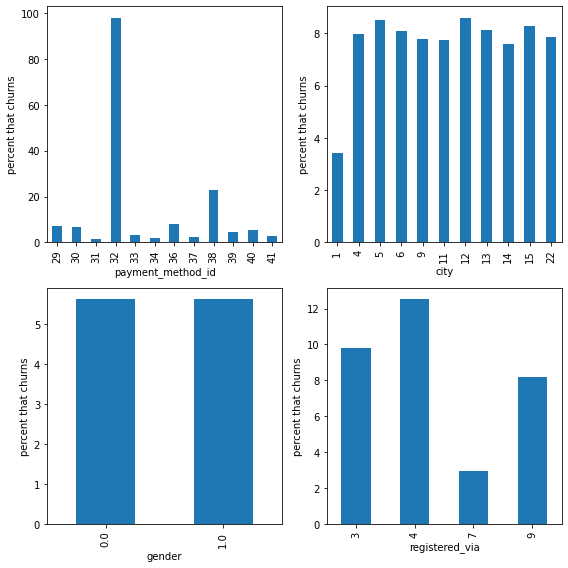

In [78]:
cat_features = ["payment_method_id", "city", "gender", "registered_via"]
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, feature in enumerate(cat_features): 
    churn_pct_by_feature = (data.groupby(by=feature).is_churn.sum() / data[feature].value_counts())*100
    churn_pct_by_feature.plot(kind="bar", ax=axs[i], xlabel=feature, ylabel="percent that churns")

plt.tight_layout()
plt.show();

Insights:
* Almost 100% of the subscribers who payed with payment method id 32 churned
* Subscribers from city 1 (which is also the most populous) are the least likely to churn
* There is no correlation between gender and likelyhood of churning
* Registration method 7 is the best at retaining subscribers - less than 4% of the subscribers who registered with method 7 churned, while over 8% of subscribers churned that registered with other methods 

### 2.2.2 Numerical Features<a id="Numerical_Features"></a>

Are subscribers who spend more time on the app more likely to renew or churn? 

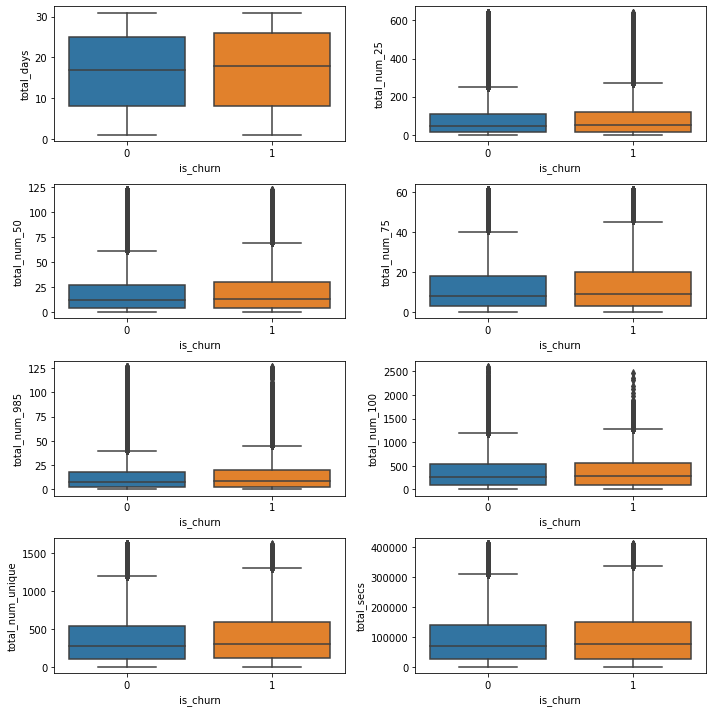

In [94]:
num_features = ["total_days", "total_num_25", "total_num_50", "total_num_75", 
                "total_num_985", "total_num_100", "total_num_unique", "total_secs"]

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs = axs.flatten()
for i, feature in enumerate(num_features): 
    sns.boxplot(x="is_churn", y=feature, data=data, ax=axs[i])

plt.tight_layout()
plt.show();

Insights:

Listening behavior has very little to do with whether or not a subscriber churns. Subscribers that churn and subscribers that renew use the service at the same rates. 

### 2.2.3 Churn, Auto-Renew, and Price<a id="Churn_Auto-Renew_and_Price"></a>

Are customers who sign up for auto-renew more or less likely to churn? How does plan price and amount paid affect that decision? 

In [135]:
# Get the counts 
top_left = format(sum((data.is_auto_renew==0) & (data.is_churn==0)), (",d"))
top_right = format(sum((data.is_auto_renew==1) & (data.is_churn==0)), (",d"))
bottom_left = format(sum((data.is_auto_renew==0) & (data.is_churn==1)), (",d"))
bottom_right = format(sum((data.is_auto_renew==1).sum() & (data.is_churn==1)), (",d"))

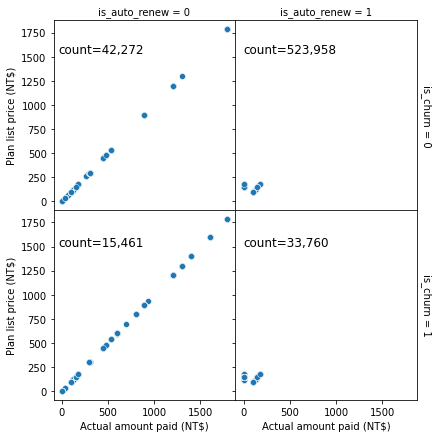

In [139]:
g = sns.FacetGrid(data=data, col="is_auto_renew", row="is_churn", margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="actual_amount_paid", y="plan_list_price")
g.set_axis_labels("Actual amount paid (NT$)", "Plan list price (NT$)")

# add counts to FacetGrid
plt.text(0,1500,"count="+bottom_right, size=12)
plt.text(-2000,1500,"count="+bottom_left, size=12)
plt.text(-2000,3500,"count="+top_left, size=12)
plt.text(0,3500,"count="+top_right, size=12)
g.fig.subplots_adjust(wspace=0, hspace=0);

Insights:   

* The first thing that stands out is that subscribers who did not sign up for auto-renew paid higher prices for the service. This is most likely because they paid for plans lasting several months or a year, while those who signed up for auto-renew chose to pay on a month-to-month basis.   
* Of the subscribers who churned (bottom panels), more than double signed up for auto-renew than did not. 
    * It is tempting to conclude that the auto-renew option is ineffective at retaining subscribers, but this is not necessarily true. Those subscribers might have churned regardless. We would need to compare the retention rate over time in order to determine more conclusively how auto-renew affects churn. 
* All the subscribers that did not sign up for auto-renew paid the listed price, while some of the customers who signed up for auto-renew paid less than the listed price. 
    * There appears to have been a promotion where subscribers who signed up for auto-renew got a discount. Was this promotion effective? Let's get the exact numbers of subscribers who got a discount, and count how many churned.

In [98]:
discount = data[data.actual_amount_paid < data.plan_list_price]
discount.shape

(634, 23)

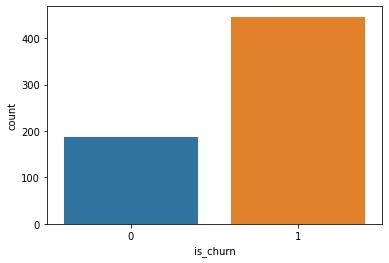

In [208]:
sns.countplot(data=discount, x="is_churn");

So in March 2017, more subscribers who got a discount churned than renewed. However, this does not mean that discounts are ineffective at preventing churn. Like the auto-renew option, we should compare the retention rate over several months before determining if discounts help retain customers. 

### 2.2.4 Churn by Registration Date<a id="Churn_by_Registration_Date"></a>

Our churn data is from March 2017. Let's take a look at the registration date of customers who did not renew the service that month. 

In [224]:
churn_by_reg = pd.DataFrame(data.groupby(by="registration_init_time").is_churn.sum())
total_count = data.groupby("registration_init_time").is_churn.count()
churn_by_reg.is_churn = (churn_by_reg.is_churn/total_count)*100
churn_by_reg = churn_by_reg.sort_index().reset_index()
churn_by_reg = churn_by_reg.rename({"is_churn":"percent_churn"}, axis=1)

In [225]:
churn_by_reg["registration_init_time"] = pd.to_datetime(churn_by_reg["registration_init_time"]
                                                       .astype(str), format="%Y%m%d")

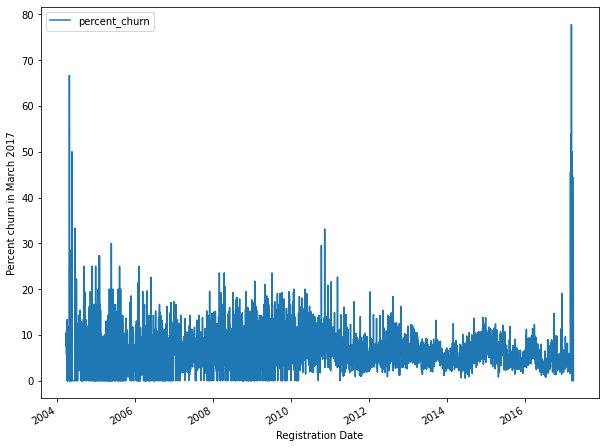

In [238]:
churn_by_reg.set_index("registration_init_time").plot(figsize=(10,8))
plt.xlabel("Registration Date")
plt.ylabel("Percent churn in March 2017")
plt.show();

In [232]:
spikes = churn_by_reg[churn_by_reg["percent_churn"] > 40]
spikes

,registration_init_time,percent_churn
30,2004-04-25,66.666667
54,2004-05-19,50.000000
4716,2017-03-03,45.454545
4719,2017-03-06,53.846154
4725,2017-03-12,77.777778
4727,2017-03-14,50.000000
4732,2017-03-19,50.000000
4737,2017-03-24,44.444444


Insights:
* There are major spikes of subscribers churning that registered in 2004 and 2017. 
    * The subcribers that registered and then churned in March 2017 are first-time users. Further analysis should be done with churn data from other months to detect if having this many first-time users churn is common. 
    * The subscribers that churn in March 2017 but registered in 2004 are unexpected. Further analysis should be done on changes that have been made recently to the app interface or pricing to determine what caused so many long-time subscribers to churn in March 2017. 
    
KKBox was founded in October 2004 (source: https://en.wikipedia.org/wiki/KKBox). Let's take a look at these original users. 

In [246]:
# isolate original users that registered in 2004
original_users = data.copy()
original_users["registration_init_time"] = pd.to_datetime(original_users["registration_init_time"]
                                                    .astype(str), format="%Y%m%d")
original_users = original_users[original_users["registration_init_time"].dt.year==2004]
original_users.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
26,+0nSx/BUYJz95M7Gu8kHn3l6khpqocMmzoExCzsRf9A=,20170301,0,37,30,149,149,1,20170403,0,...,9,2004-09-03,16,43,14,12,8,258,302,70313.471
27,+0qp8s9V3eIIPGNZpQzmFNOetFXHApbV7WGgVXcisCY=,20170331,0,34,30,149,149,1,20170430,0,...,9,2004-09-05,2,3,1,0,0,22,26,5085.366
70,+40AbtgttyyrM+LwjLROnbjPROq1dtIcIKRf7hIRAvE=,20170328,0,29,30,180,180,1,20170428,0,...,9,2004-07-26,11,34,16,11,10,89,125,30421.882
131,+8dDfvcPB2w6jBoSd9c6g/RGdYqM5hF97DhXHq3FDjQ=,20170309,0,36,30,180,180,1,20170408,0,...,9,2004-07-08,18,18,8,8,6,404,194,111152.016
159,+AsTZ45UZIHTpKlI0s83lBxt+K3oVqzygOrwD0GjrZk=,20170331,0,34,30,149,149,1,20170430,0,...,9,2004-07-16,2,16,6,0,0,16,30,4957.586


In [247]:
original_users.shape

(5707, 23)

In [262]:
# percent of users registered in 2004 that churn
(original_users.is_churn.value_counts()[1] / original_users.shape[0])*100

7.096548098826003

In [263]:
# percent of all users that churn
(data.is_churn.value_counts()[1] / data.shape[0])*100

5.626760446007433

The percent of original subscribers that churned in March 2017 is not significantly higher than the number of subscribers overall that churned in March 2017. 

### 2.2.5 Churn by Age<a id="Churn_by_Age"></a>

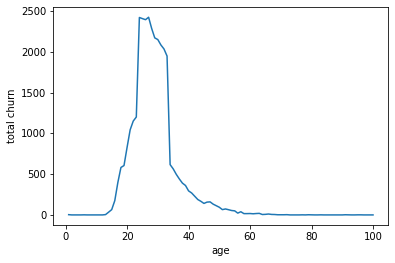

In [206]:
churn_by_age = data.groupby("age").is_churn.sum()
churn_by_age.plot(ylabel="total churn");

Insights:

Most of the customers that churned were 20 to 40 years old. However, this does not tell us much, as most of the population is in the 20-40 age group.

In the Data Wrangling step, we replaced about 300,000 missing age values with values between 24 and 34, which was the 25th percentile and 75th percentile respectively of the data that was available.

Age alone should not be used as an indicator of whether or not a user will churn. 

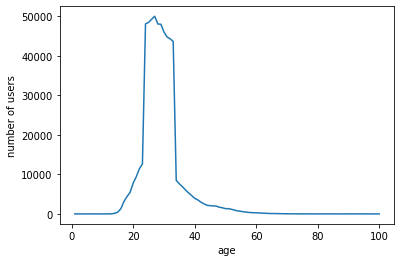

In [207]:
pop_by_age = data.copy()
pop_by_age["ones"] = 1
pop_by_age.groupby("age").ones.count().plot(ylabel="number of users");

## 2.3 Feature Correlation Heatmap<a id="Feature_Correlation_Heatmap"></a>

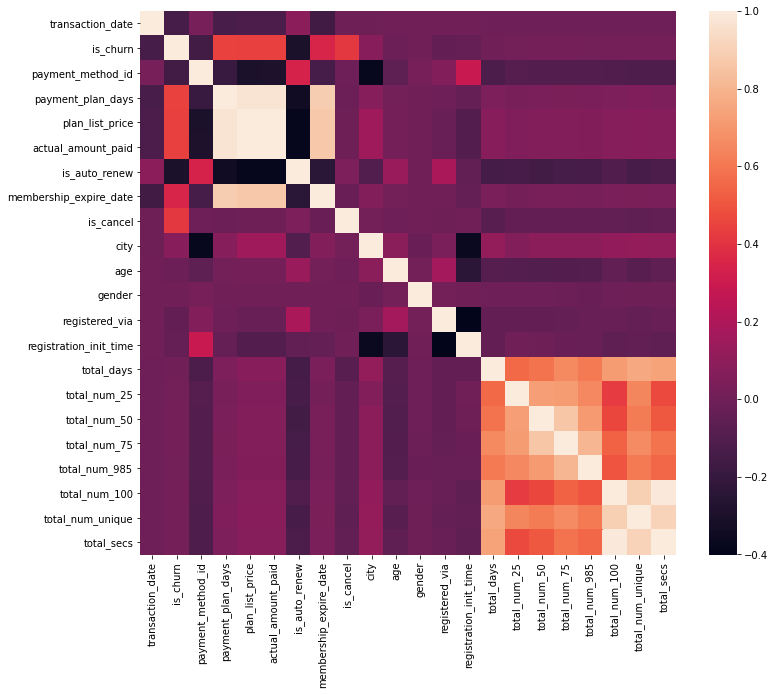

In [266]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr());

Insights:
* The payment data and the user listening data is highly correlated, as expected. 
* membership_expire_date and is_cancel are used to compute churn, so it is not surprising that these features are correlated.
* There is an interesting correlation between payment_plan_days, plan_list_price, and actual_amount_paid. 

## 2.4 Primary Components Analysis<a id="Primary_Components_Analysis"></a>

We will use Primary Components Analysis (PCA) to visualize churn. 

In [284]:
# Remove features that cannot be used for PCA; i.e. no features that are not naturally numerical
remove = ["msno", "transaction_date", "is_churn", "payment_method_id", "is_auto_renew", 
         "membership_expire_date", "is_cancel", "city", "gender", "registered_via", 
         "registration_init_time"]

scaled_data = data.drop(remove, axis=1)
columns = scaled_data.columns

# scale data
scaled_data = scale(scaled_data)

In [286]:
# confirm the mean of scaled data is 0, and the standard deviation is 1
scaled_data_df = pd.DataFrame(scaled_data, columns=columns)
scaled_data_df.mean()

payment_plan_days     1.576247e-17
plan_list_price      -6.437624e-17
actual_amount_paid   -8.988515e-17
age                  -1.639013e-17
total_days           -1.099583e-16
total_num_25         -8.266118e-18
total_num_50          5.423900e-17
total_num_75         -2.858798e-17
total_num_985         3.879628e-17
total_num_100         6.200773e-17
total_num_unique     -2.216930e-17
total_secs           -4.088057e-17
dtype: float64

In [287]:
scaled_data_df.std()

payment_plan_days     1.000001
plan_list_price       1.000001
actual_amount_paid    1.000001
age                   1.000001
total_days            1.000001
total_num_25          1.000001
total_num_50          1.000001
total_num_75          1.000001
total_num_985         1.000001
total_num_100         1.000001
total_num_unique      1.000001
total_secs            1.000001
dtype: float64

In [290]:
scaled_data_df.head()

,payment_plan_days,plan_list_price,actual_amount_paid,age,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,-0.110935,-0.346401,-0.345016,0.612268,-0.831365,-0.665248,-0.781161,-0.977638,-0.749599,-0.936954,-0.967282,-0.975419
1,-0.110935,0.016229,0.017400,0.936570,0.443730,-0.206410,-0.202701,-0.577871,-0.418104,-0.457671,-0.604495,-0.430306
2,-0.110935,0.016229,0.017400,2.233774,1.187536,-0.373260,-0.299111,-0.018197,0.045988,0.087621,0.203390,0.094433
3,-0.110935,0.016229,0.017400,-0.198484,0.868762,-0.049988,0.761400,1.341011,0.244885,0.216770,-0.095375,0.216350
4,-0.110935,0.016229,0.017400,2.558075,-1.362654,-0.185554,-0.491931,-0.178104,-0.550702,-0.879555,-0.711197,-0.852287


In [288]:
# Calculate the primary components
data_PCA = PCA().fit(scaled_data_df)

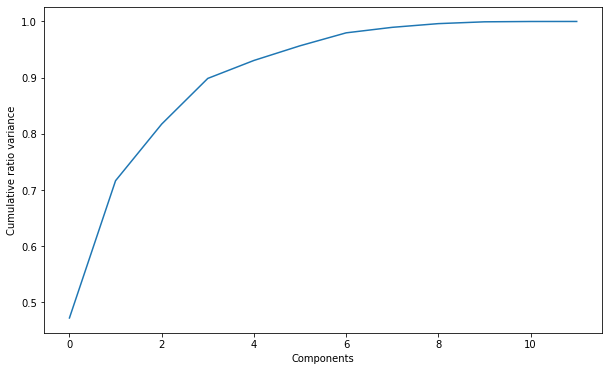

In [289]:
# Plot the cumulative sum of the primary components
plt.subplots(figsize=(10,6))
plt.plot(data_PCA.explained_variance_ratio_.cumsum())
plt.xlabel("Components")
plt.ylabel("Cumulative ratio variance")
plt.show();

In [300]:
pc_var = 100 * data_PCA.explained_variance_ratio_.cumsum()[1]
print("The first two components explain {:.2f}% of the variance.".format(pc_var))

The first two components explain 71.66% of the variance.


In [292]:
# Apply PCA transformation to data
transformed_data = data_PCA.transform(scaled_data_df)
transformed_data.shape

(599990, 12)

In [295]:
pca_df = pd.DataFrame({"PC1":transformed_data[:,0], "PC2":transformed_data[:,1], "is_churn":data.is_churn})
pca_df.head()

,PC1,PC2,is_churn
0,-2.508235,-0.192728,0
1,-0.923149,0.075957,0
2,0.239323,-0.006352,0
3,1.241175,-0.181583,0
4,-1.968208,0.201112,0


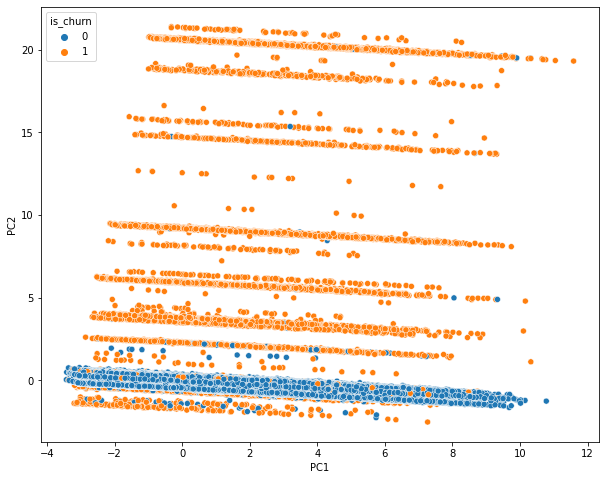

In [302]:
# plot a scatterplot of is_churn with PC1 and PC2 on the x and y axes
plt.subplots(figsize=(10,8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="is_churn")
plt.show();